# Problem 1.9


## Problem statement

A particle of mass $m$ is in the state $$\Psi(x,t) = A e^{-a[(mx^2/\hbar)+it]},$$


where $A$ and $a$ are positive real constants.

* Find $A$
* For what potential energy function $V(x)$ does $\Psi$ satisfy the Schr\"odinger equation?
* Calculate expectation values of $x$, $x^2$, $p$, $p^2$.
* Verify that products are consistent with the uncertainty principle.

----

## Solution

### Normalizing

This is carried out just like in problem 1.5.

In [1]:
import sympy as sp
from sympy.physics.quantum.constants import hbar

sp.init_printing()

A, a, m = sp.symbols("A a m", real=True, positive=True)
x,t = sp.symbols("x t", real=True)


Psi = A*sp.exp(-a*((m*x**2/hbar)+sp.I*t))
Psi

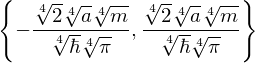

In [2]:
normvals = sp.solveset(sp.Eq(1,sp.integrate(Psi * sp.conjugate(Psi), (x, -sp.oo, sp.oo))),A)
normvals

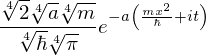

In [3]:
Psi = Psi.subs(A, next(iter(normvals)))
Psi

### Finding $V(x)$

I mentioned in class that I wasn't sure if you could tackle this yet, but the reason is computational, rather than mathematical. The mathematical process is that we substitute $\Psi$ into Schr\"odinger's equation, and solve for $V$. Since there aren't any derivatives of $V$, we're solving an algebraic equation rather than a differential equation, and `sympy.solveset` can do the work for us.

The piece we haven't covered is how to take derivatives using `sympy`, which we need to do to get the Schr\"odinger equation before we can solve it.  Recall that the Schr\"odinger equation is $$ i\hbar {\partial \Psi\over\partial t} = -{\hbar^2\over 2 m}{\partial^2\Psi\over\partial x^2} + V\Psi.$$

Later on, we will see how to define an operator that takes the derivatives for us, but for now, we'll do them explicitly. We use `sympy.diff` to calculate differentials.

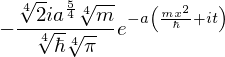

In [4]:
dPsidt = sp.diff(Psi, t)
dPsidt

To get the second derivative, we just need to pass in another argument.

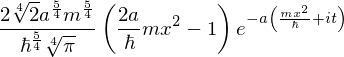

In [5]:
dsqPsidxsq = sp.diff(Psi, x, 2)
dsqPsidxsq

Now we build our equation and solve.

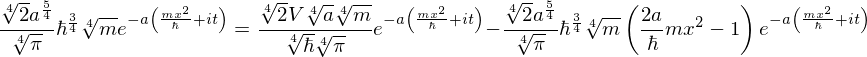

In [6]:
V = sp.symbols("V", real=True)
schro = sp.Eq(sp.I*hbar*dPsidt, -hbar**2/(2*m)*dsqPsidxsq + V*Psi)
schro

This looks a lot messier than it actually is (there's all kinds of mass cancellation), but it would still be a little annoying to do by hand.

In [7]:
sp.solveset(schro, V)

That can be simplified just a touch (to get rid of the $\pm\hbar a$).

In [8]:
sp.Eq(V, next(iter(sp.solveset(schro, V))).simplify())

### Expectation Values

We've done expectation values for $x$ and $x^2$ in problem 1.5, but now we additionally want expectation values for $p$ and $p^2$. To correctly comptute these, we'll need to take derivatives, since $$p = {\hbar\over i} {\partial\over \partial x}.$$ 

In [9]:
expectx = sp.integrate(sp.conjugate(Psi)*x*Psi, (x, -sp.oo, sp.oo))
expectxsq = sp.integrate(sp.conjugate(Psi)*x**2*Psi, (x, -sp.oo, sp.oo))

expectp = -hbar*sp.I*sp.integrate(sp.conjugate(Psi)*sp.diff(Psi, x), (x, -sp.oo, sp.oo))
expectpsq = -hbar**2*sp.integrate(sp.conjugate(Psi)*sp.diff(Psi, x, 2), (x, -sp.oo, sp.oo))

In [10]:
expectx

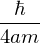

In [11]:
expectxsq

In [12]:
expectp

In [13]:
expectpsq

### The Uncertainty Principle

Variances are calculated as before.

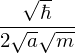

In [14]:
sigmax = sp.sqrt(expectxsq - expectx**2)
sigmap = sp.sqrt(expectpsq - expectp**2)

sigmax

In [15]:
sigmap

Now the product.

In [16]:
sigmax*sigmap

**AMAZING!!!** The uncertainty principle is validated (with the equality instead of the inequality).

----

## Portfolio references
* Problem 1.5

## Index terms
* Finding potential
* Normalization
* Expectation values
* Uncertainty principle
* sympy substitution
* sympy solving


## Book references
* Schr\"odinger equation, p. 1; equation 1.1

## External references